In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [136]:
df = pd.read_csv('fetal_health.csv')
df.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [137]:
df['fetal_health'] = df['fetal_health'].astype(int) - 1

In [138]:
st_data  = StandardScaler().fit_transform(df[df.columns[:-1]])
x_train, x_test, y_train, y_test = train_test_split(st_data, df['fetal_health'].values, train_size = 0.75)
y_train, y_test = keras.utils.to_categorical(y_train), keras.utils.to_categorical(y_test)

In [139]:
model = keras.Sequential()

model.add(layers.Dense(128, activation = 'relu',  input_shape = (len(x_train[0]),)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(3 , activation = 'softmax'))

model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 128)               2816      
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dense_58 (Dense)            (None, 32)                2080      
                                                                 
 dense_59 (Dense)            (None, 16)                528       
                                                                 
 dense_60 (Dense)            (None, 3)                 51        
                                                                 
Total params: 13,731
Trainable params: 13,731
Non-trainable params: 0
_________________________________________________________________


In [140]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 15, batch_size = 1, validation_split = 0.15, verbose = 1, 
          callbacks = tf.keras.callbacks.EarlyStopping(patience = 5))

Epoch 1/15
1354/1354 [==============================] - 11s 5ms/step - loss: 0.4012 - accuracy: 0.8523 - val_loss: 0.2934 - val_accuracy: 0.8750
Epoch 2/15
1354/1354 [==============================] - 7s 5ms/step - loss: 0.2772 - accuracy: 0.8914 - val_loss: 0.2498 - val_accuracy: 0.8958
Epoch 3/15
1354/1354 [==============================] - 3s 2ms/step - loss: 0.2417 - accuracy: 0.8966 - val_loss: 0.2747 - val_accuracy: 0.9042
Epoch 4/15
1354/1354 [==============================] - 4s 3ms/step - loss: 0.2192 - accuracy: 0.9055 - val_loss: 0.2661 - val_accuracy: 0.9125
Epoch 5/15
1354/1354 [==============================] - 3s 2ms/step - loss: 0.2088 - accuracy: 0.9158 - val_loss: 0.2199 - val_accuracy: 0.9083
Epoch 6/15
1354/1354 [==============================] - 3s 2ms/step - loss: 0.1859 - accuracy: 0.9225 - val_loss: 0.2134 - val_accuracy: 0.9042
Epoch 7/15
1354/1354 [==============================] - 3s 2ms/step - loss: 0.1793 - accuracy: 0.9188 - val_loss: 0.2346 - val_accuracy

In [141]:
model.evaluate(x_test, y_test)

17/17 [==============================] - 4s 2ms/step - loss: 0.2617 - accuracy: 0.9229


[0.26166635751724243, 0.9229323267936707]

In [8]:
import cv2
import os
import numpy as np
from xml.etree import ElementTree
import matplotlib.pyplot as plt

In [9]:
data = [plt.imread('images/' + file) for file in os.listdir('images')]

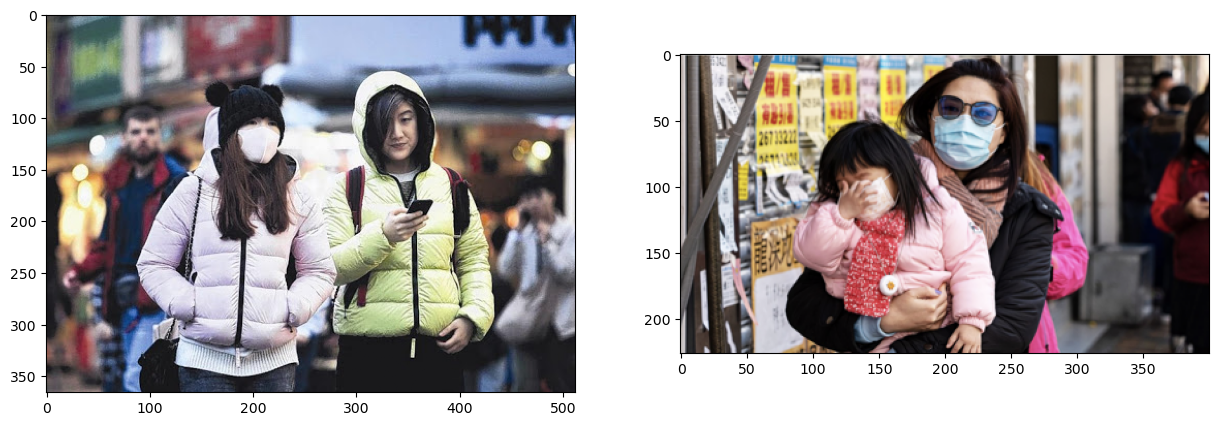

In [10]:
plt.subplots(figsize = (15, 10))
plt.subplot(1, 2, 1)
plt.imshow(data[0])
plt.subplot(1, 2, 2)
plt.imshow(data[3])
plt.show()

In [11]:
i = 0
labels, pics = [], []
for file in os.listdir('annotations'):
    tree = ElementTree.parse('annotations/' + file)
    for el in tree.iter():
        if el.tag == 'name':
            labels.append(el.text)
        if el.tag == 'bndbox':
            for tag in el:
                if tag.tag == 'xmin':
                    xmin = int(tag.text)
                if tag.tag == 'ymin':
                    ymin = int(tag.text)   
                if tag.tag == 'xmax':
                    xmax = int(tag.text)
                if tag.tag == 'ymax':
                    ymax = int(tag.text)
            pics.append(data[i][ymin:ymax, xmin:xmax])
    i += 1

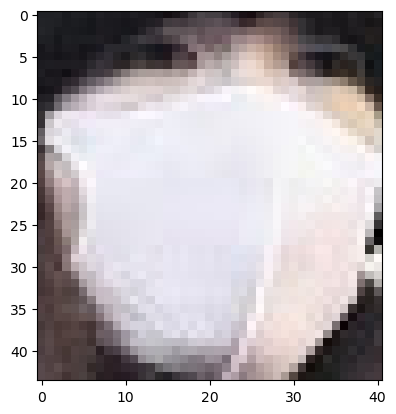

In [12]:
plt.imshow(pics[1])

In [13]:
np.unique([d.shape[2] for d in pics], return_counts = True)

(array([3, 4]), array([  72, 4000], dtype=int64))

In [14]:
pics = [cv2.cvtColor(pic, cv2.COLOR_RGBA2RGB) if pic.shape[2] == 4 else pic for pic in pics]

In [15]:
pics = [cv2.resize(pic, (64, 64)) for pic in pics]

In [16]:
unique_labels = list(np.unique(labels))
labels = [unique_labels.index(label) for label in labels]
x_train, x_test, y_train, y_test = train_test_split(pics, labels, train_size = 0.75)
y_train, y_test = keras.utils.to_categorical(y_train), keras.utils.to_categorical(y_test)
x_train, x_test = np.array(x_train),  np.array(x_test)

In [17]:
model = keras.Sequential()

model.add(layers.Conv2D(32, 4, 2, padding = 'same', input_shape = x_train.shape[1:]))
model.add(layers.LeakyReLU(0.1))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(64, 4, 2, padding = 'same'))
model.add(layers.LeakyReLU(0.1))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(128, 4, 2, padding = 'same'))
model.add(layers.LeakyReLU(0.1))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        1568      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          32832     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 64)          0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                  

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train,  batch_size = 30, epochs = 10,   verbose = 1,  validation_split = 0.15)

Epoch 1/10
87/87 [==============================] - 4s 21ms/step - loss: 0.3867 - accuracy: 0.8570 - val_loss: 0.2619 - val_accuracy: 0.9259
Epoch 2/10
87/87 [==============================] - 2s 21ms/step - loss: 0.2331 - accuracy: 0.9322 - val_loss: 0.2272 - val_accuracy: 0.9194
Epoch 3/10
87/87 [==============================] - 2s 22ms/step - loss: 0.1896 - accuracy: 0.9391 - val_loss: 0.2124 - val_accuracy: 0.9368
Epoch 4/10
87/87 [==============================] - 2s 22ms/step - loss: 0.1746 - accuracy: 0.9457 - val_loss: 0.2332 - val_accuracy: 0.9194
Epoch 5/10
87/87 [==============================] - 2s 22ms/step - loss: 0.1774 - accuracy: 0.9426 - val_loss: 0.2005 - val_accuracy: 0.9412
Epoch 6/10
87/87 [==============================] - 2s 22ms/step - loss: 0.1616 - accuracy: 0.9418 - val_loss: 0.2026 - val_accuracy: 0.9325
Epoch 7/10
87/87 [==============================] - 2s 21ms/step - loss: 0.1361 - accuracy: 0.9541 - val_loss: 0.2025 - val_accuracy: 0.9325
Epoch 8/10
87

In [19]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 6ms/step - loss: 0.1578 - accuracy: 0.9479


[0.15784265100955963, 0.9479371309280396]

In [20]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [21]:
df = pd.read_csv('JEOPARDY_CSV.csv')
df.columns = [col.replace(' ', '') for col in df.columns]
df = df[df['Category'].isin(df['Category'].value_counts()[:4].index.tolist())][['Category', 'Question']]

In [22]:
df.head(10)

,Category,Question
268,SCIENCE,"At sea level at 70 degrees this travels 1,129 ..."
274,SCIENCE,"The largest tree, the General Sherman in Calif..."
280,SCIENCE,"(<a href=""http://www.j-archive.com/media/2006-..."
286,SCIENCE,6 elements once known as inert gases are now k...
292,SCIENCE,"(<a href=""http://www.j-archive.com/media/2006-..."
716,AMERICAN HISTORY,"On May 29, 1765 Patrick Henry's Stamp Act prot..."
1221,AMERICAN HISTORY,It became a U.S. territory in 1900 & a state 5...
1227,AMERICAN HISTORY,Susan B. Anthony was arrested in 1872 for doin...
1233,AMERICAN HISTORY,In 1949 Henry H. Arnold became the first gener...
1239,AMERICAN HISTORY,In April 1984 this U.S. government agency admi...


In [23]:
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [24]:
df['Question'] = [re.sub(f'[^{string.ascii_lowercase + string.digits + string.whitespace}]', '', 
                  ' '.join([lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]).lower()) 
                  for text in df['Question'].values]
categories = sorted(df['Category'].unique())
df['Category'].replace(categories, range(4), inplace = True)

In [25]:
vectorize = tf.keras.layers.TextVectorization(max_tokens = 10000, output_sequence_length = 30, split = 'whitespace')
vectorize.adapt(tf.data.Dataset.from_tensor_slices(df['Question'].values))
texts = np.array(vectorize(df['Question'].values))

In [26]:
x_train, x_test, y_train, y_test = train_test_split(texts, df['Category'], train_size = 0.85)
y_train, y_test = keras.utils.to_categorical(y_train), keras.utils.to_categorical(y_test)

In [115]:
model = keras.Sequential()

model.add(layers.Embedding(vectorize.vocabulary_size(), 128))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences = True)))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(4, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, None, 128)         934656    
                                                                 
 bidirectional_13 (Bidirecti  (None, None, 128)        98816     
 onal)                                                           
                                                                 
 bidirectional_14 (Bidirecti  (None, 64)               41216     
 onal)                                                           
                                                                 
 dense_34 (Dense)            (None, 4)                 260       
                                                                 
Total params: 1,074,948
Trainable params: 1,074,948
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.fit(x_train, y_train, epochs = 10, batch_size = 10, validation_split = 0.15, verbose = 1, 
          callbacks = tf.keras.callbacks.EarlyStopping(patience = 3))

Epoch 1/10
143/143 [==============================] - 22s 65ms/step - loss: 1.1728 - accuracy: 0.4692 - val_loss: 0.7054 - val_accuracy: 0.7589
Epoch 2/10
143/143 [==============================] - 6s 45ms/step - loss: 0.2268 - accuracy: 0.9364 - val_loss: 0.6190 - val_accuracy: 0.7708
Epoch 3/10
143/143 [==============================] - 5s 35ms/step - loss: 0.0500 - accuracy: 0.9888 - val_loss: 0.7456 - val_accuracy: 0.7826
Epoch 4/10
143/143 [==============================] - 5s 36ms/step - loss: 0.0182 - accuracy: 0.9965 - val_loss: 0.9004 - val_accuracy: 0.7747
Epoch 5/10
143/143 [==============================] - 5s 37ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.9089 - val_accuracy: 0.7747


In [117]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 1s 9ms/step - loss: 0.8618 - accuracy: 0.8013


[0.8618208169937134, 0.8013467788696289]